In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


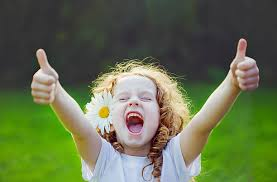

In [4]:
img = image.load_img(r'C:\Swapna\Learning\PYTHON\FS DataScience\GenAI\Practise\CNN\ImageClassification\training\happy\pic1.jpeg')
img

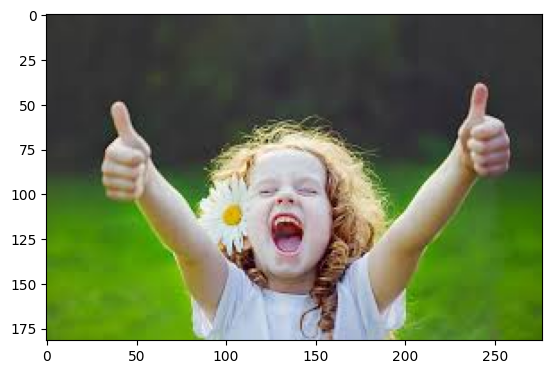

In [5]:
plt.imshow(img)

In [ ]:
i1 = cv2.imread(r'C:\Swapna\Learning\PYTHON\FS DataScience\GenAI\Practise\CNN\ImageClassification\training\happy\pic1.jpeg')
print(i1)


array([[[ 49,  51,  51],
        [ 49,  51,  51],
        [ 49,  51,  51],
        ...,
        [ 49,  49,  49],
        [ 48,  48,  48],
        [ 48,  48,  48]],

       [[ 49,  51,  51],
        [ 49,  51,  51],
        [ 49,  51,  51],
        ...,
        [ 49,  49,  49],
        [ 48,  48,  48],
        [ 48,  48,  48]],

       [[ 49,  51,  51],
        [ 49,  51,  51],
        [ 49,  51,  51],
        ...,
        [ 49,  49,  49],
        [ 49,  49,  49],
        [ 48,  48,  48]],

       ...,

       [[ 14, 126,  78],
        [ 17, 129,  81],
        [ 19, 134,  85],
        ...,
        [  3, 115,  68],
        [  4, 113,  67],
        [  5, 110,  65]],

       [[ 13, 125,  77],
        [ 15, 127,  79],
        [ 17, 132,  83],
        ...,
        [  5, 113,  67],
        [  6, 111,  66],
        [  8, 109,  64]],

       [[ 11, 123,  75],
        [ 14, 126,  78],
        [ 16, 131,  82],
        ...,
        [  6, 111,  66],
        [  7, 110,  65],
        [  7, 108,  63]]

In [9]:
i1.shape

(182, 277, 3)

Scaling the images

In [11]:
train =ImageDataGenerator(rescale = 1/200)
validation = ImageDataGenerator(rescale = 1/200)

In [16]:
train_dataset = train.flow_from_directory(r'C:\Swapna\Learning\PYTHON\FS DataScience\GenAI\Practise\CNN\ImageClassification\training', target_size = (200, 200), batch_size = 32, class_mode = 'binary')
validation_dataset = validation.flow_from_directory(r'C:\Swapna\Learning\PYTHON\FS DataScience\GenAI\Practise\CNN\ImageClassification\validation', target_size = (200, 200), batch_size = 32, class_mode = 'binary')

Found 11 images belonging to 2 classes.


Found 0 images belonging to 2 classes.


In [17]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [18]:
validation_dataset.class_indices

{'happy': 0, 'sad': 1}

In [19]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
validation_dataset.classes

array([], dtype=int32)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])                      
    

                                   
                                  
                                    

c:\Users\swapn\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [40]:
model_fit = model.fit(train_dataset, epochs = 15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 1.0000 - loss: 0.1405
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 1.0000 - loss: 0.0784
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 1.0000 - loss: 0.0437
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 1.0000 - loss: 0.0276
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 1.0000 - loss: 0.0185
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 1.0000 - loss: 0.0134
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 1.0000 - loss: 0.0105
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 1.0000 - loss: 0.0081
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 1.0000 - loss: 0.0066
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 1.0000 - loss: 0.0049
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 1.0000 - loss: 0.0040
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 1.0000 - lo

In [43]:
dir_path=(r"C:\Swapna\Learning\PYTHON\FS DataScience\GenAI\Practise\CNN\ImageClassification\testing")
for i in os.listdir(dir_path):
    print(i)

pic2.jpeg
pic3.jpeg
pic4.jpeg
pic5.jpeg
pic6.jpeg
spic2.jpeg
spic3.jpeg
spic4.jpeg
spic5.jpeg


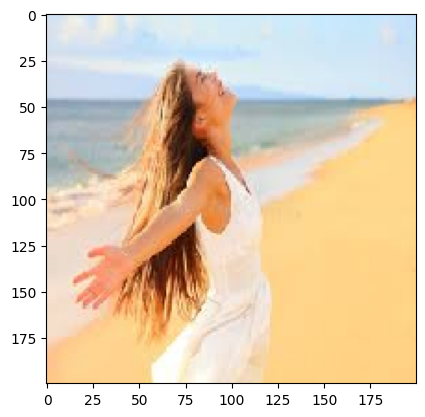

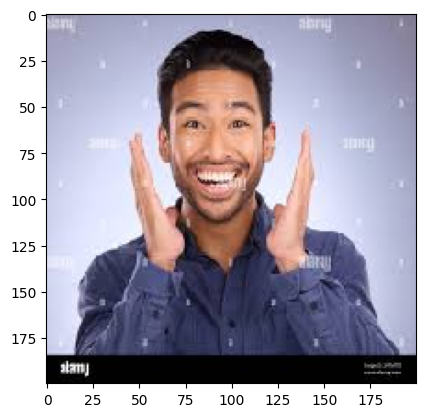

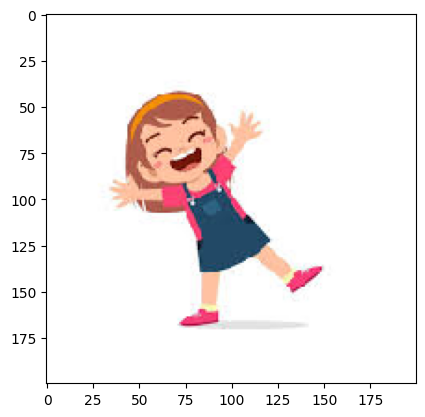

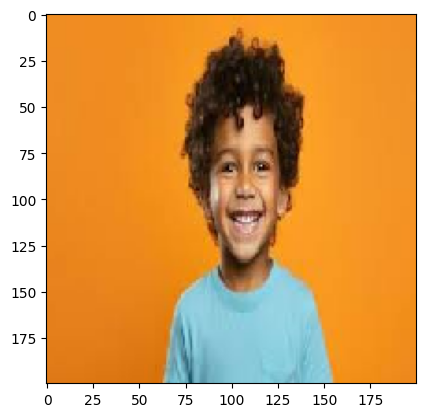

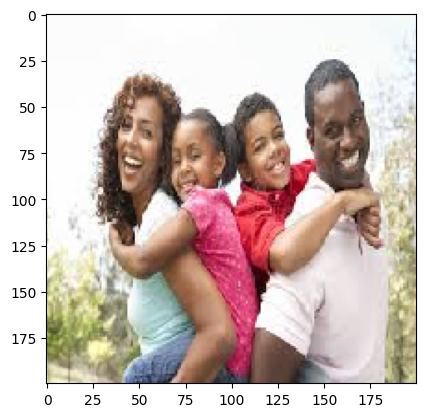

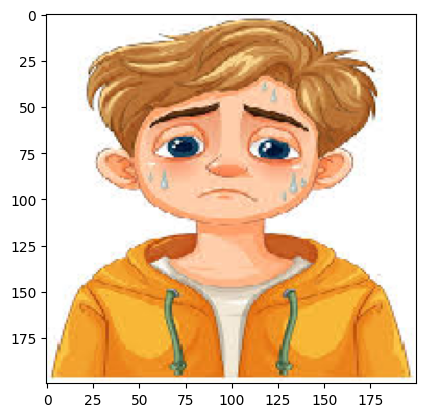

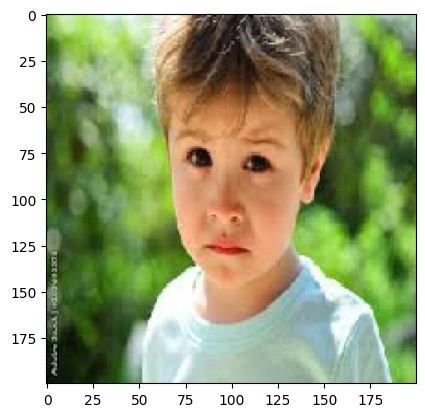

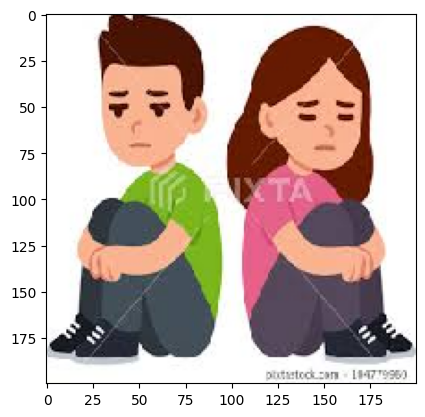

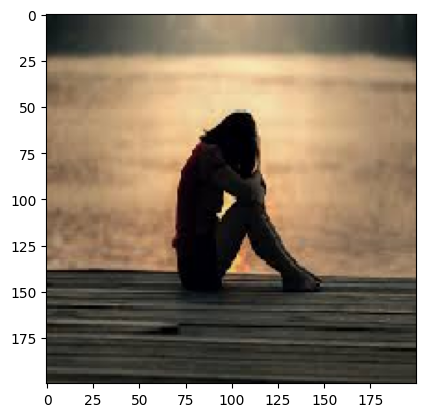

In [45]:
dir_path=(r"C:\Swapna\Learning\PYTHON\FS DataScience\GenAI\Practise\CNN\ImageClassification\testing")
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    

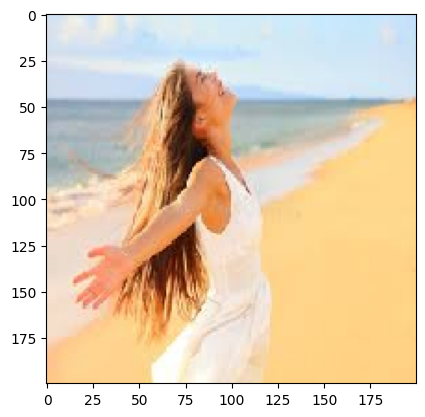

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Happy Image


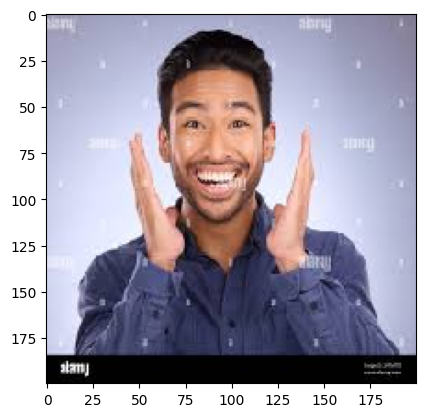

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Happy Image


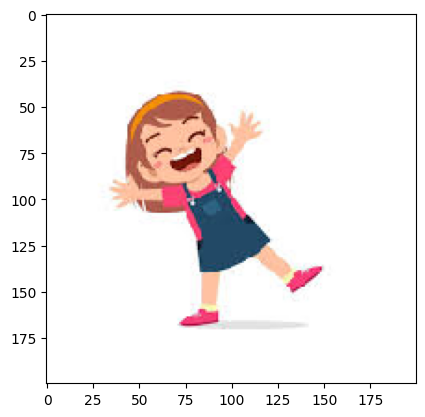

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Happy Image


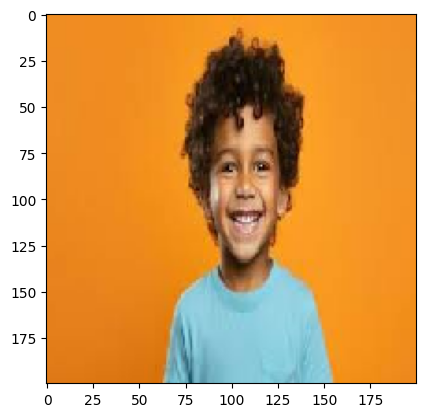

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Happy Image


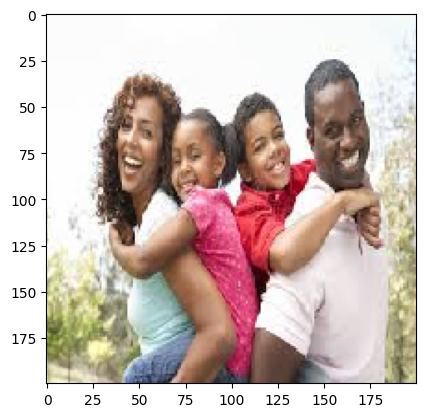

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Happy Image


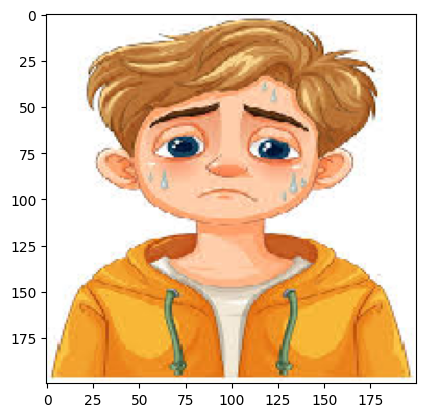

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Sad Image


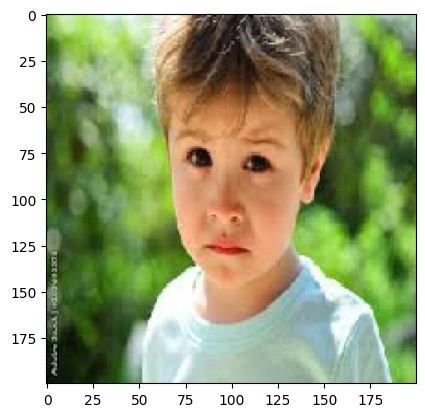

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Sad Image


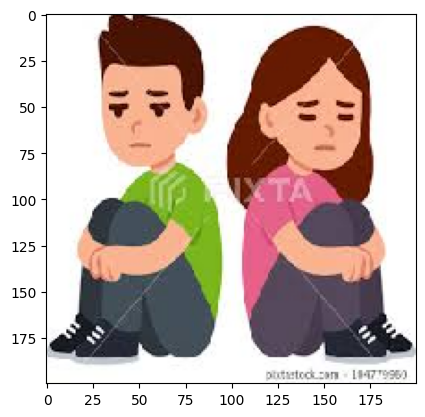

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Sad Image


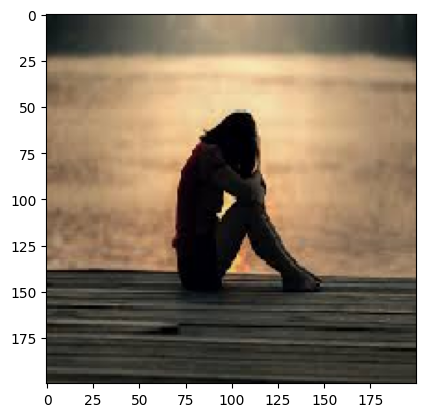

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Sad Image


In [49]:
dir_path=(r"C:\Swapna\Learning\PYTHON\FS DataScience\GenAI\Practise\CNN\ImageClassification\testing")
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0 :
        print('Happy Image')
    else:
        print('Sad Image')
    